In [1]:
import torch as t
from torch.autograd import Variable as V
#matplotlib inline
from matplotlib import pyplot as plt
from IPython import display

In [3]:
##设置随机种子
t.manual_seed(1000)

def get_fake_data(batch_size=8):
    '''产生随机数据 y=x*2+3'''
    x=t.rand(batch_size,1)*20 #01之间的随机数
    y=x*2+(1+t.randn(batch_size,1))*3 #01正态分布
    return x,y

tensor([[17.0112],
        [10.8470],
        [ 3.6933],
        [ 2.8655],
        [11.7062],
        [18.6544],
        [ 4.6567],
        [13.9879]]) tensor([[38.6472],
        [28.8935],
        [10.1868],
        [ 9.0964],
        [24.8543],
        [41.9183],
        [12.7673],
        [24.5303]])


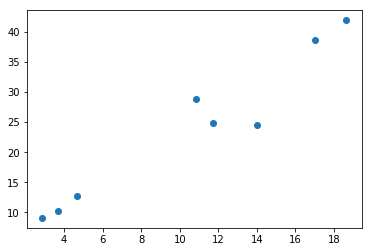

In [15]:
x,y=get_fake_data()
print(x,y)
plt.scatter(x.squeeze().numpy(),y.squeeze().numpy())  #去除维度为1

In [19]:
#随机初始参数
w=V(t.rand(1,1),requires_grad=True)
b=V(t.zeros(1,1),requires_grad=True)

lr=0.001

In [33]:
for ii in range(8000):
    x,y=get_fake_data()
    x,y=V(x),V(y)
    
    #FORWARD
    y_pred=x.mm(w)+b.expand_as(y)
    loss=0.5*(y_pred-y)**2
    loss=loss.sum()
    
    #backward
    loss.backward()
    
    #更新参数
    w.data.sub_(lr*w.grad.data)
    b.data.sub_(lr*b.grad.data)
    
    #梯度清零
    w.grad.data.zero_()
    b.grad.data.zero_()
    
    print(w)
    w.long()
    
    if ii%1000==0:
        #绘图
        display.clear_output(wait=True)
        x=t.arange(0,20).view(-1,1)
        w.data.long()
        y=x.mm(w.data)+b.data.expand_as(x)
        plt.plot(x.numpy(),y.numpy())#predicted
        
        x2,y2=get_fake_data(batch_size=20)
        plt.scatter(x2.numpy(),y2.numpy()) #True
        plt.xlim(0,20)
        plt.ylim(0,41)
        plt.show()#输出图
        plt.pause(0.5)
        
print(w.data.squeeze()[0],b.data.squeeze()[0])
    

RuntimeError: Expected object of scalar type Long but got scalar type Float for argument #2 'mat2'